<a href="https://colab.research.google.com/github/educbd/EDAs/blob/main/Groundhog_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis in Python

In this Python notebook, I aim to perform fundamental Exploratory Data Analysis (EDA) on a dataset. My objective is to comprehend the data, identify any anomalies, and address them using the basic data cleaning techniques acquired during my enrollment in the **Data Analytics for Business Program** at **St. Clair College**.

In [22]:
# To commence our notebook, let's set it up with the necessary
# libraries essential for Exploratory Data Analysis (EDA).

import pandas as pd # to read the datasets
import numpy as np # to execute calculations
import matplotlib.pyplot as plt # to create some visualizations
import missingno as msno # used to plot missing values

In this analysis, I will utilize the **"Groundhog Day Forecasts and Temperatures"** dataset. The primary purpose of using this dataset is to investigate and determine the accuracy of Punxsutawney Phil's winter weather forecast.

In [4]:
# We will proceed by reading the CSV file that requires analysis and assign it
# to a variable named raw_df. As the CSV file has been uploaded to a GitHub
# repository, we can effortlessly access it using the provided link below:
# https://github.com/educbd/EDAs/blob/main/Groundhog%20Day.csv

raw_df = pd.read_csv('https://github.com/educbd/EDAs/blob/main/Groundhog%20Day.csv?raw=True')

In [11]:
# After storing the dataset into a variable, it is always recommended to create
# a copy of it before beginning any work. This ensures that we work on the
# copied version, leaving the original dataset intact and unchanged:

ghd = raw_df.copy()

In [15]:
# Here is how the dataset looks like:

ghd.head(5)

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# To show the number of rows and columns we can use the .shape method in the dataset:

ghd.shape

(132, 10)

In [16]:
# Now let's show the column's names:

ghd.columns

Index(['Year', 'Punxsutawney Phil', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)'],
      dtype='object')

In [19]:
# First things first. Let's rename the columns due to their
# excessively long names. We can achieve this using the .str.replace() function,
# specifying the text to be replaced as the first argument and the
# new text as the second argument:

ghd.columns = ghd.columns.str.replace('February', 'feb')
ghd.columns = ghd.columns.str.replace('March', 'mar')
ghd.columns = ghd.columns.str.replace('Average', 'avg')
ghd.columns = ghd.columns.str.replace('Temperature', 'temp')
ghd.columns = ghd.columns.str.replace(' ', '_')
ghd.columns

Index(['Year', 'Punxsutawney_Phil', 'feb_avg_temp', 'feb_avg_temp_(Northeast)',
       'feb_avg_temp_(Midwest)', 'feb_avg_temp_(Pennsylvania)', 'mar_avg_temp',
       'mar_avg_temp_(Northeast)', 'mar_avg_temp_(Midwest)',
       'mar_avg_temp_(Pennsylvania)'],
      dtype='object')

In [20]:
# To determine the number of unique values in each column, we can utilize
# the .nunique() function on the dataset:

ghd.nunique()

Year                           132
Punxsutawney_Phil                4
feb_avg_temp                   116
feb_avg_temp_(Northeast)        84
feb_avg_temp_(Midwest)          90
feb_avg_temp_(Pennsylvania)     86
mar_avg_temp                   112
mar_avg_temp_(Northeast)        82
mar_avg_temp_(Midwest)          85
mar_avg_temp_(Pennsylvania)     85
dtype: int64

In [ ]:
# This is useful to determine if a column contains different values for each row
# like 'Year', or if the values are repeated like in the 'Punxsutawney_Phil' column
# that only shows 4 different values for all the 132 rows in the dataset.

In [21]:
# Let's go a little deeper in our understanding of the data.
# This next code shows the class of our data, how's the data indexed, column names
# null values and data types. All that as simplier as this function:

ghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         132 non-null    object 
 1   Punxsutawney_Phil            131 non-null    object 
 2   feb_avg_temp                 123 non-null    float64
 3   feb_avg_temp_(Northeast)     123 non-null    float64
 4   feb_avg_temp_(Midwest)       123 non-null    float64
 5   feb_avg_temp_(Pennsylvania)  123 non-null    float64
 6   mar_avg_temp                 123 non-null    float64
 7   mar_avg_temp_(Northeast)     123 non-null    float64
 8   mar_avg_temp_(Midwest)       123 non-null    float64
 9   mar_avg_temp_(Pennsylvania)  123 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.4+ KB


In [ ]:
# At this stage, we encounter several issues with the dataset:
# 1) As observed earlier, the "Punxsutawney_Phil" column consists of only four
#    distinct values, indicating it can be treated as a categorical column (also feature).
# 2) We notice a significant number of null values in most of our features since the total
#    amount of rows are 132 and the non-null count is 123 for most of our features.


In [35]:
# to solve the first issue, we can change the data type of each feature
# using the .astype() function:

ghd.Punxsutawney_Phil = ghd['Punxsutawney_Phil'].astype('category')
ghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Year                         132 non-null    object  
 1   Punxsutawney_Phil            131 non-null    category
 2   feb_avg_temp                 123 non-null    float64 
 3   feb_avg_temp_(Northeast)     123 non-null    float64 
 4   feb_avg_temp_(Midwest)       123 non-null    float64 
 5   feb_avg_temp_(Pennsylvania)  123 non-null    float64 
 6   mar_avg_temp                 123 non-null    float64 
 7   mar_avg_temp_(Northeast)     123 non-null    float64 
 8   mar_avg_temp_(Midwest)       123 non-null    float64 
 9   mar_avg_temp_(Pennsylvania)  123 non-null    float64 
dtypes: category(1), float64(8), object(1)
memory usage: 9.7+ KB


In [23]:
# So we can count the number of missing values easly:

ghd.isna().sum()

Year                           0
Punxsutawney_Phil              1
feb_avg_temp                   9
feb_avg_temp_(Northeast)       9
feb_avg_temp_(Midwest)         9
feb_avg_temp_(Pennsylvania)    9
mar_avg_temp                   9
mar_avg_temp_(Northeast)       9
mar_avg_temp_(Midwest)         9
mar_avg_temp_(Pennsylvania)    9
dtype: int64

<Axes: >

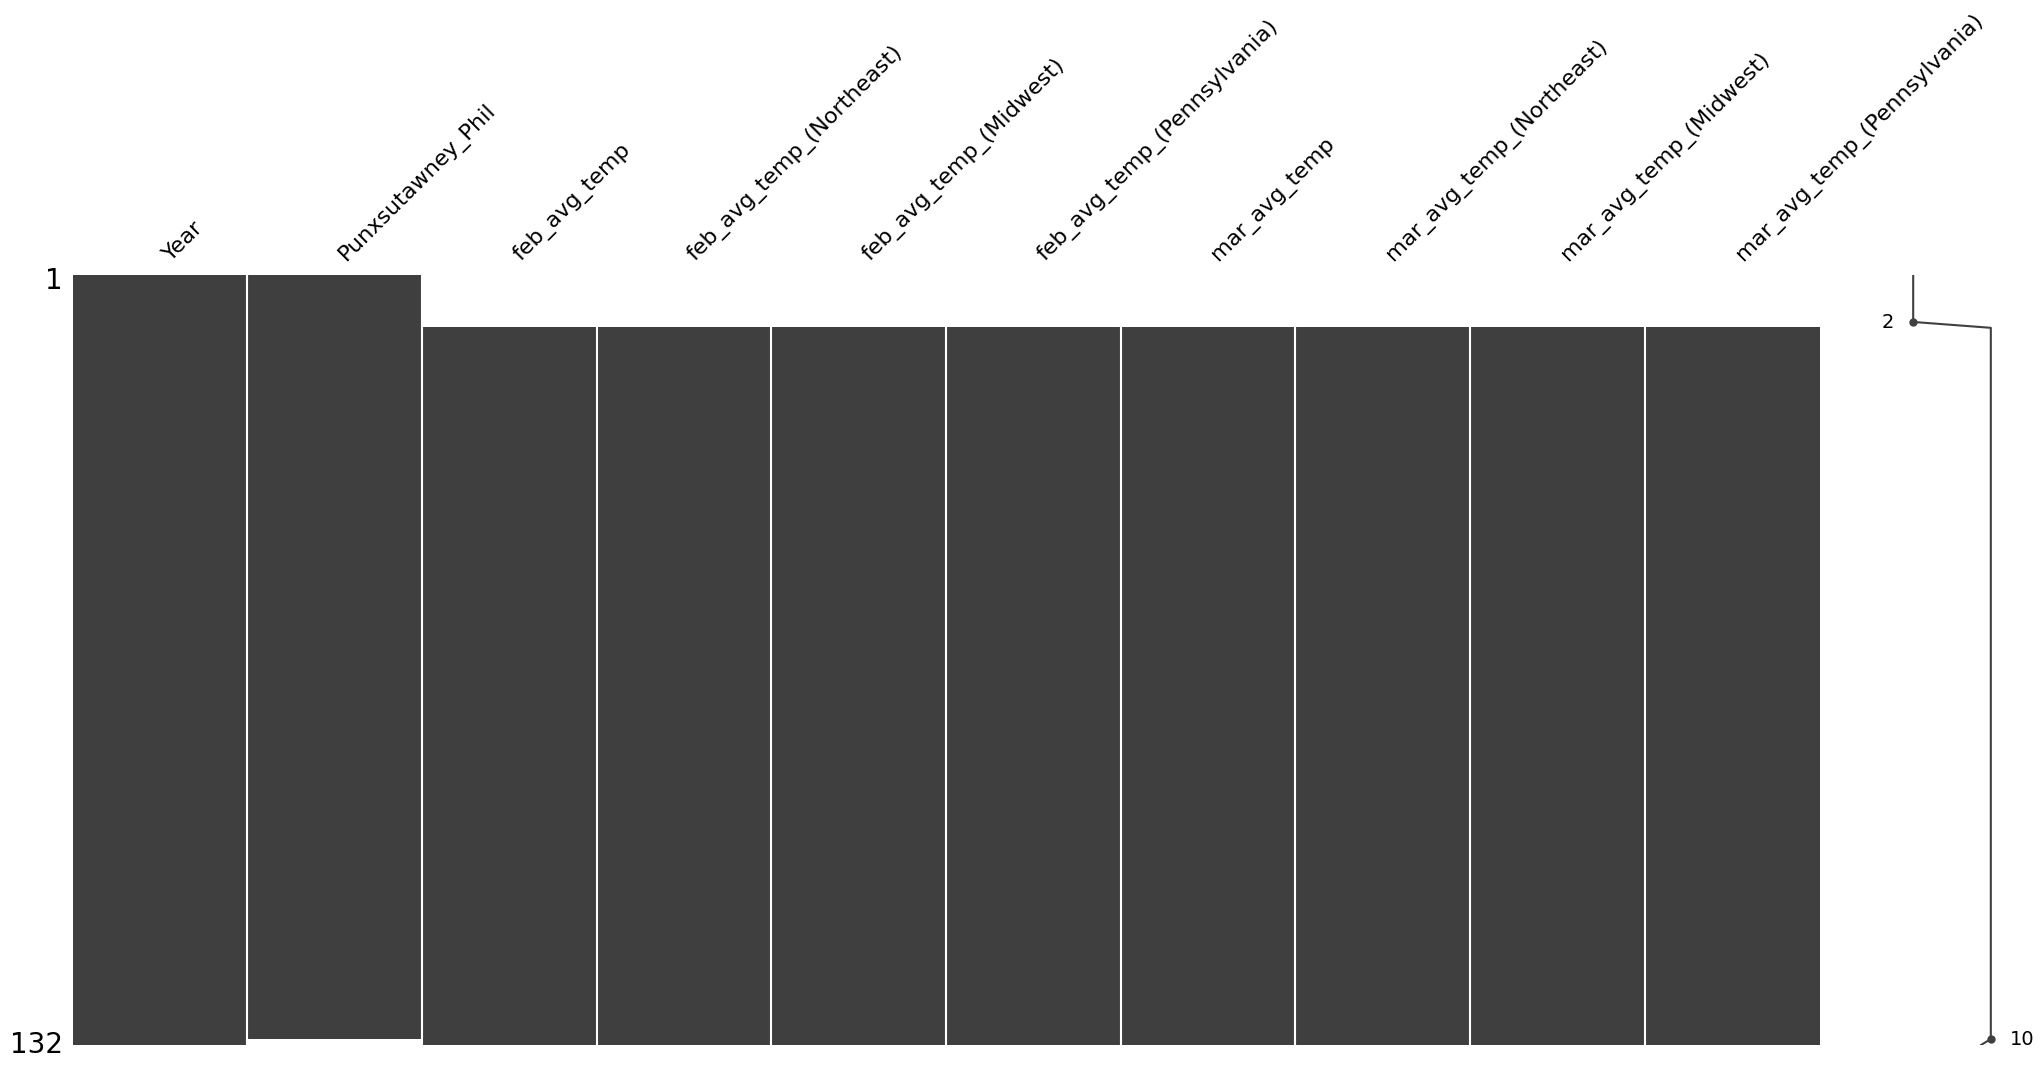

In [24]:
# Is better to use a plot to have a better idea where are our missing values
# 'phisically' located in our dataset. We can use the missingno library:

msno.matrix(ghd)

In [ ]:
# In this graph we can observate a null value at the bottom of the Punxsutawney_Phil feature
# and in the biggining of the last 8 features.

In [36]:
# There are much to do with missing values but for prupose of this notebook I will just
# drop them since are not much representative for our analysis.

# Dropping missing values:
ghd = ghd.dropna()

<Axes: >

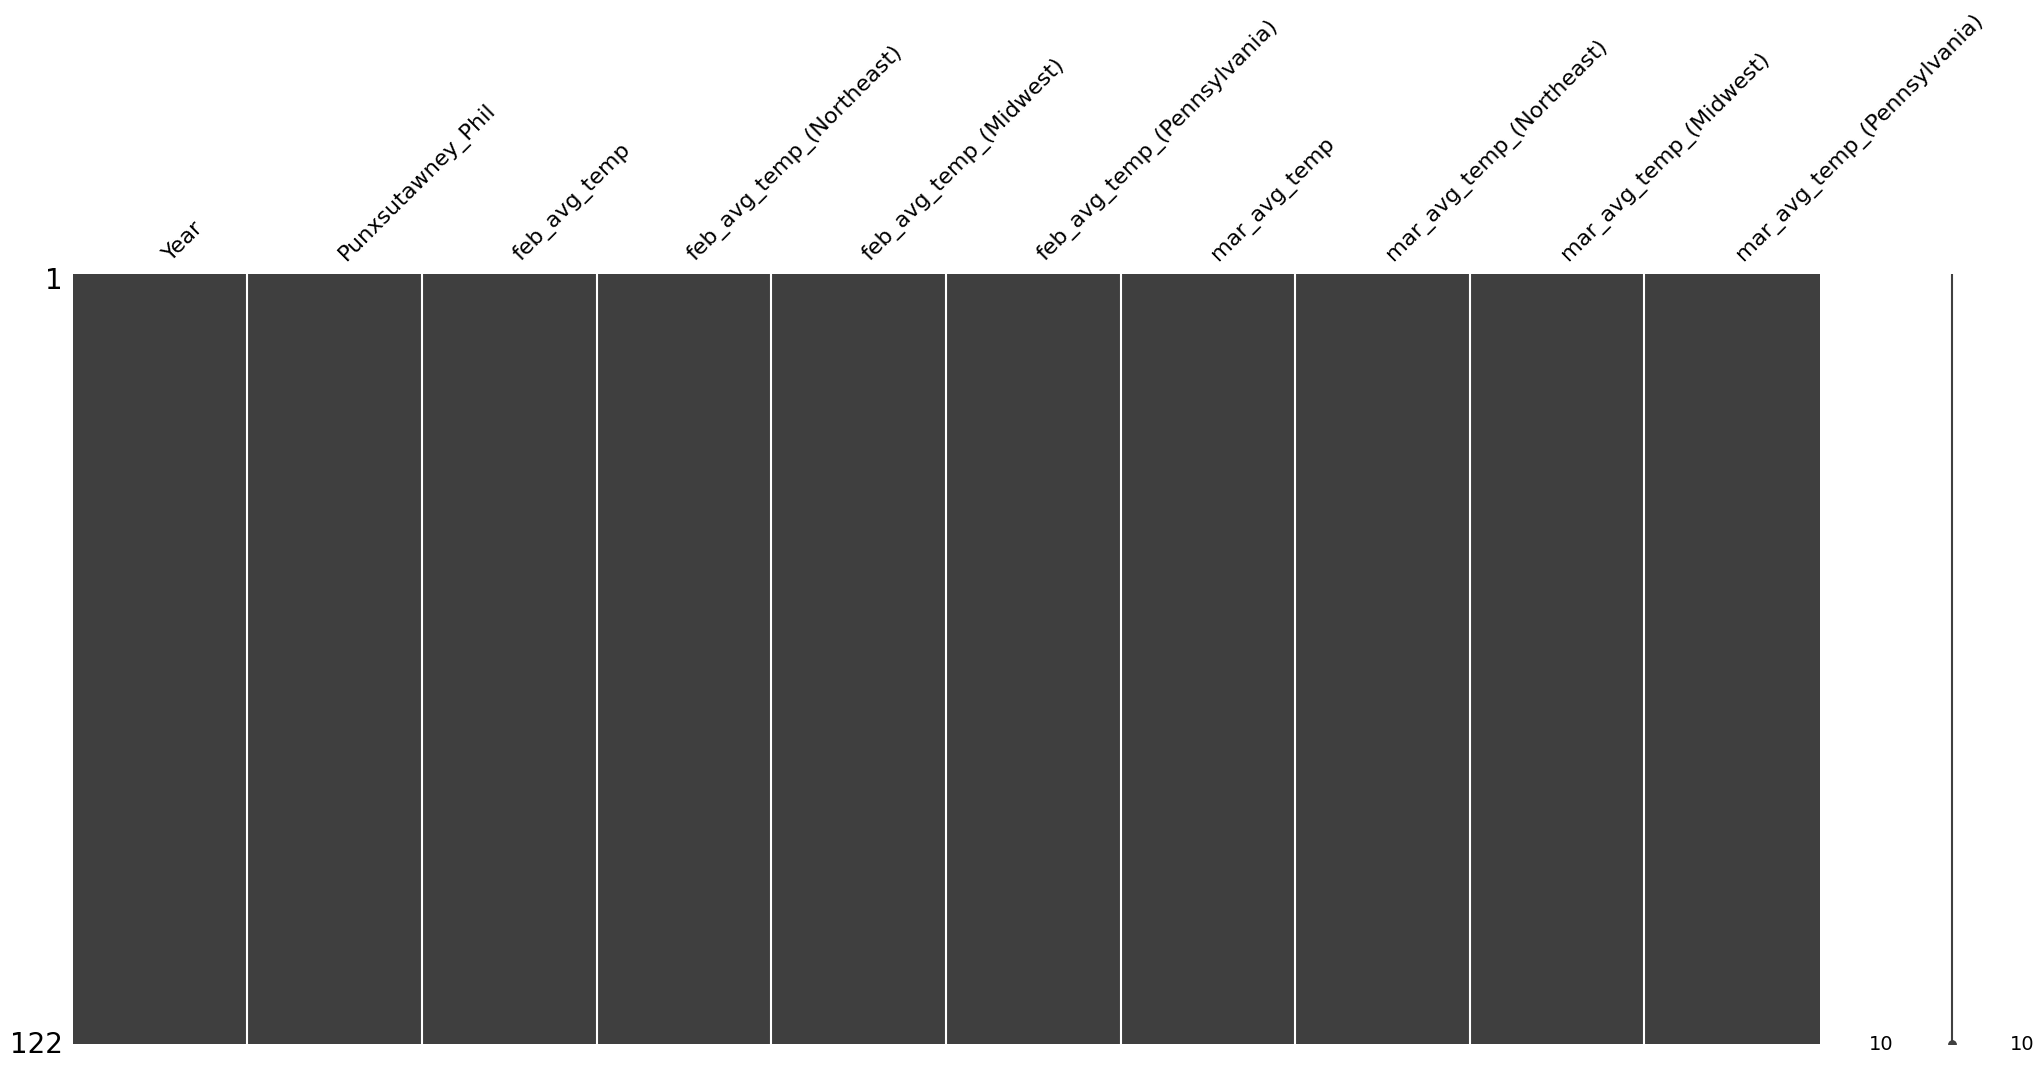

In [37]:
# Recreate the plot to compare the results:
msno.matrix(ghd)

In [38]:
# There is no more missing values in any feature and we can double check with our
# .isna().sum()  function:

ghd.isna().sum()

Year                           0
Punxsutawney_Phil              0
feb_avg_temp                   0
feb_avg_temp_(Northeast)       0
feb_avg_temp_(Midwest)         0
feb_avg_temp_(Pennsylvania)    0
mar_avg_temp                   0
mar_avg_temp_(Northeast)       0
mar_avg_temp_(Midwest)         0
mar_avg_temp_(Pennsylvania)    0
dtype: int64